In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
# 1.1 Đọc dữ liệu
df = pd.read_csv('orginal_sales_data_edit.csv', encoding = 'utf-8', header = 0, delimiter=',')

In [5]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,PAYMENTFULLNAME
0,10107,30,95.70,2,2871.00,2/24/2003,Shipped,1,2,2003,...,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,Yu Kwai
1,10121,34,81.35,5,2765.90,5/7/2003,Shipped,2,5,2003,...,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,Henriot Paul
2,10134,41,94.74,2,3884.34,7/1/2003,Shipped,3,7,2003,...,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,DaCunha Daniel
3,10145,45,83.26,6,3746.70,8/25/2003,Shipped,3,8,2003,...,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,Young Julie
4,10159,49,100.00,14,5205.27,10/10/2003,Shipped,4,10,2003,...,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,Brown Julie


In [3]:
# 1.2 Loại bỏ dòng dữ liệu rỗng
df.dropna(how='all', inplace=True)

In [4]:
#1.3 Loại bỏ dữ liệu trùng, biết rằng dữ liệu trùng là dữ liệu đồng thời ORDERNUMBER và ORDERDATE như nhau
# (*) Kiểm tra lại nghiệp vụ này
#df.drop_duplicates(subset=['ORDERNUMBER', 'ORDERDATE'], inplace=True)
df.drop_duplicates(inplace=True)

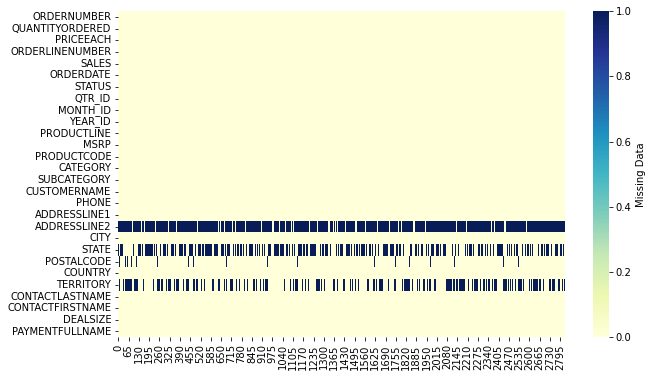

In [5]:
#1.4 Kiểm tra các dữ liệu thiếu bằng chart 
# Trực quan dữ liệu thiếu với Seaborn Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("my_mising_value_1.png", dpi=100)


<Figure size 720x432 with 0 Axes>

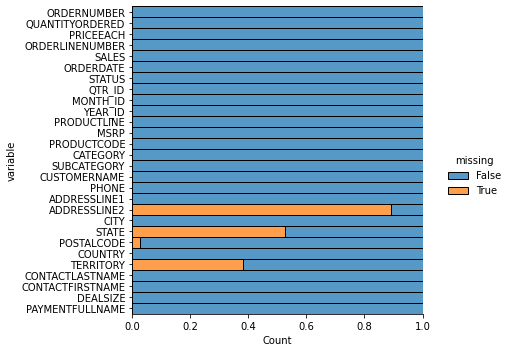

In [6]:
#Các cột dữ liệu màu đậm đang bị thiếu dữ liệu
# (Cách 2) 1.4 Kiểm tra các dữ liệu thiếu bằng chart 
# Trực quan dữ liệu với Seaborn Displot
plt.figure(figsize =(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue= "missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("my_missing_value_2.png", dpi=100)


In [7]:
#1.4.1 Điền thiếu dữ liệu với dữ liệu định tính
    #1.4.1.1 Với dữ liệu biểu diễn dạng chuỗi thì thay bằng Unknown
    #1.4.1.2 Với dữ liệu biểu diễn dạng số thì thay bằng 0
df['ADDRESSLINE2'].fillna('Unknown', inplace=True)
df['STATE'].fillna('Unknown', inplace=True)
df['TERRITORY'].fillna('Unknown', inplace=True)
df['POSTALCODE'].fillna('Unknown', inplace=True)

In [8]:
#1.5 Tách cột PAYMENFULLNAME thành PAYMENLASTNAME và PAYMENFIRSTNAME, sau đó xóa cột PAYNAMEFULLNAME
df[['PAYMENTLASTNAME', 'PAYMENTFIRSTNAME']]= df['PAYMENTFULLNAME'].str.split(' ', expand=True)
df = df.drop('PAYMENTFULLNAME', axis=1)
df[['PAYMENTLASTNAME', 'PAYMENTFIRSTNAME']]

,PAYMENTLASTNAME,PAYMENTFIRSTNAME
0,Yu,Kwai
1,Henriot,Paul
2,DaCunha,Daniel
3,Young,Julie
4,Brown,Julie
...,...,...
2818,Freyre,Diego
2819,Koskitalo,Pirkko
2820,Freyre,Diego
2821,Roulet,Annette


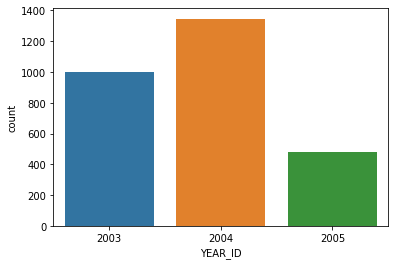

"Có thể dùng biểu đồ barplot với nhiều tùy chỉnh trong hàm tổng hợp: count, mean, sum, min, max, std\nfrom numpy import count_nonzero\nsns.barplot(x = 'YEAR_ID',\n            y = 'ORDERNUMBER',\n            data = df, ci=None, estimator=count_nonzero) #default astimator=mean\n#Show the plot\nplt.show()\n"

In [9]:
#1.6 Hãy cho biết số lượng đơn hàng theo năm (YEAR_ID)
sns.countplot(x="YEAR_ID", data=df)
plt.show()

'''Có thể dùng biểu đồ barplot với nhiều tùy chỉnh trong hàm tổng hợp: count, mean, sum, min, max, std
from numpy import count_nonzero
sns.barplot(x = 'YEAR_ID',
            y = 'ORDERNUMBER',
            data = df, ci=None, estimator=count_nonzero) #default astimator=mean
#Show the plot
plt.show()
'''

ĐẾM CÓ BAO NHIÊU ĐƠN HÀNG TRONG MỘT NĂM

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_7752/3794047764.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'YEAR_ID',


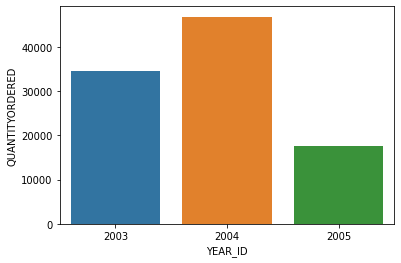

In [10]:
#1.1.1.bis Hãy cho biết số lượng sản phẩm bán theo năm (YEAR_ID)
sns.barplot(x = 'COUNTRY',
            y = 'QUANTITYORDERED',
            data = df, ci = None, estimator=sum) #default estimator=mean

# Show the plot
plt.show()

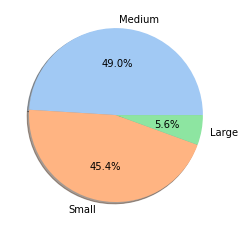

"Hoặc sử dụng nâng cao với nhiều tùy chỉnh trong hàm tổng hợp\n\ngb = df.groupby(['DEALSIZE'])['ORDERNUMBER'].agg(['count'])\ndata = list(gb['count'])\nlabels = gb.index\n\ncolors = sns.color_palette('pastel')\nplt.pie(values, labels = labels, colors=colors, autopct='%1.1f%%', shadow=True)\nplt.show()\n"

In [11]:
#1.1.2 Hãy cho biết tỉ lệ số đơn hàng theo DEALSIZE
labels = df['DEALSIZE'].value_counts().index
values = df['DEALSIZE'].value_counts().values
colors = sns.color_palette('pastel')
plt.pie(values, labels = labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()


'''Hoặc sử dụng nâng cao với nhiều tùy chỉnh trong hàm tổng hợp

gb = df.groupby(['DEALSIZE'])['ORDERNUMBER'].agg(['count'])
data = list(gb['count'])
labels = gb.index

colors = sns.color_palette('pastel')
plt.pie(values, labels = labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()
'''

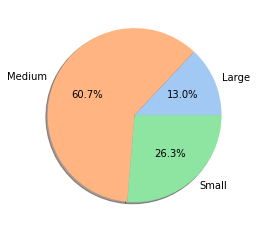

In [12]:
#1.1.3 Hãy cho biết tỉ lệ giá trị SALES theo DEALSIZE 
gb = df.groupby(['DEALSIZE'])['SALES'].agg(['sum'])
data = list(gb['sum'])
labels = gb.index

colors = sns.color_palette('pastel')
plt.pie(data, labels = labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()


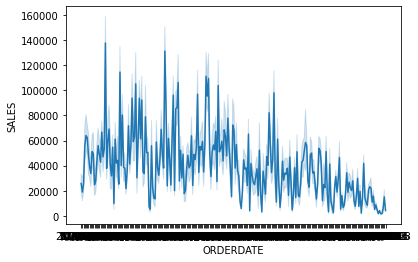

In [13]:
#1.1.7 Hãy cho biết tổng giá trị SALES theo ngày
sns.lineplot(x = "ORDERDATE", y = "SALES", data = df, estimator=sum)
plt.show()

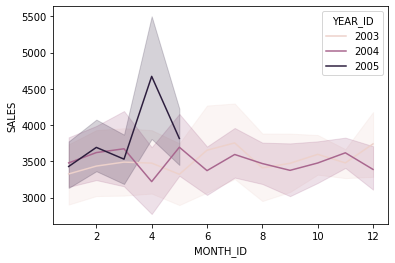

In [14]:
#1.1.8 Hãy cho biết giá trị SALES trung bình theo tháng năm 
sns.lineplot(x="MONTH_ID", y ="SALES", hue='YEAR_ID', data =df) #default estimator = mean
plt.show()

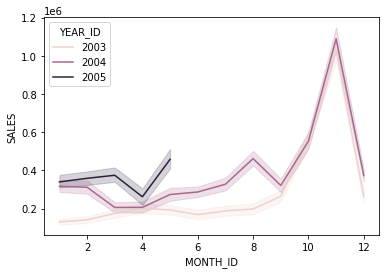

In [16]:
#1.1.8-bis Hãy cho biết tổng giá trị SALES theo tháng năm
sns.lineplot(x = "MONTH_ID", y = 'SALES',hue='YEAR_ID', data = df, estimator=sum) #default estimator = mean
plt.show()

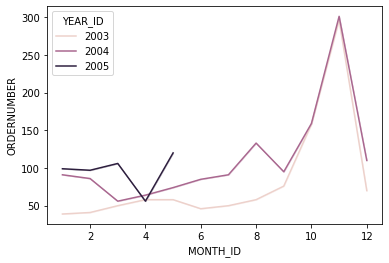

In [17]:
#1.1.9 Hãy cho biết số lượng hóa đơn theo tháng năm
# (*) Gợi ý biểu đồ line
from numpy import count_nonzero 
sns.lineplot(x = "MONTH_ID", y ="ORDERNUMBER", hue="YEAR_ID", data = df, estimator=count_nonzero)
plt.show()

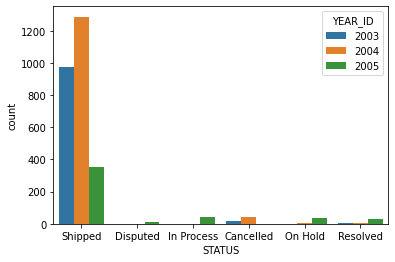

'Có thể dùng biểu đồ barplot nâng cao với nhiều tùy chỉnh hàm phù hợp\nsns.barplot(x= \'STATUS\',y=\'ORDERNUMBER\', data=df, hue="YEAR_ID"\nci=None, estimator=count_nonzero) #default estimator = mean\n\n#show the plot\nplt.show()\n'

In [18]:
#1.2.1 Hãy cho biết trạng thái số đơn hàng (STATUS) theo nhóm các năm (YEAR_ID)

sns.countplot(x= 'STATUS', data=df, hue="YEAR_ID")
plt.show()

'''Có thể dùng biểu đồ barplot nâng cao với nhiều tùy chỉnh hàm phù hợp
sns.barplot(x= 'STATUS',y='ORDERNUMBER', data=df, hue="YEAR_ID"
ci=None, estimator=count_nonzero) #default estimator = mean

#show the plot
plt.show()
'''

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_7752/2282566599.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x= 'STATUS',


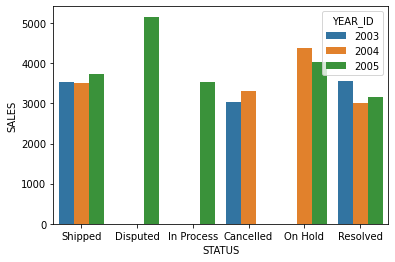

In [24]:
#1.2.1-bis Hãy cho biết trung bình giá trị đơn hàng 
# theo trạng thái (STATUS) theo nhóm các năm (YEAR_ID)
sns.barplot(x= 'STATUS',
            y = 'SALES',  
            hue="YEAR_ID",
            data=df, ci= None) #default estimator=mean

#Show the plot
plt.show() 

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_7752/3628972693.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x= 'STATUS',


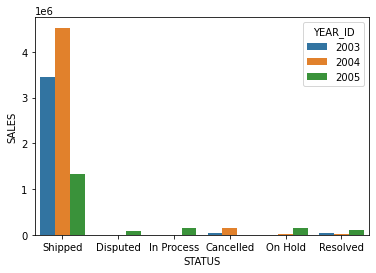

In [21]:
#1.2.1-bis-bis Hãy cho biết tổng giá trị đơn hàng 
# theo trạng thái (STATUS) theo nhóm các năm (YEAR_ID)
sns.barplot(x= 'STATUS',
            y = 'SALES',  
            hue="YEAR_ID",
            data=df, ci= None,
            estimator=sum) #default estimator=mean

#Show the plot
plt.show() 

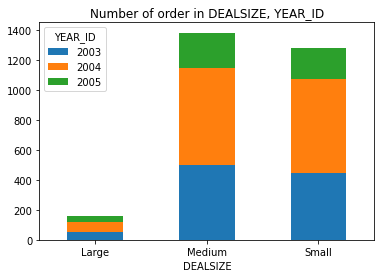

In [25]:
#1.2.3 Hãy cho biết số lượng hóa đơn giữa các nhóm DEALSIZE theo YEAR_ID
gb = df.groupby(['DEALSIZE','YEAR_ID'])['ORDERNUMBER'].count().unstack()
gb.plot(kind='bar', stacked=True)

# Just add a title and rotate the x-axis labels to be horizontal.
plt.title('Number of order in DEALSIZE, YEAR_ID')
plt.xticks(rotation=0, ha='center')
plt.show()

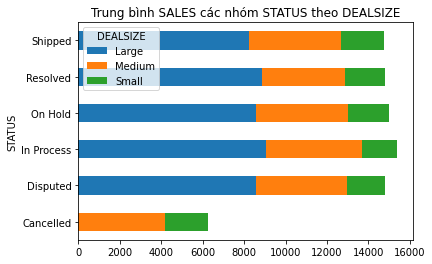

In [26]:
#1.2.4 Hãy cho biết trung bình SALES các nhóm STATUS theo DEALSIZE
gb = df.groupby(['STATUS','DEALSIZE'])['SALES'].mean().unstack()
gb.plot(kind='barh', stacked=True)

# Just add a title and rotate the x-axis labels to be horizontal.
plt.title('Trung bình SALES các nhóm STATUS theo DEALSIZE')
plt.xticks(rotation=0, ha='center')
plt.show()

PHẦN 3 MÔ TẢ DỮ LIỆU

In [27]:
#2.1.1.1 Mô tả dữ liệu của QUANTITYORDERED 
df.groupby('DEALSIZE')['QUANTITYORDERED'].describe()

#hoặc dùng: df.groupby('DEALSIZE')['SALES'].describe().unstack()


,count,mean,std,min,25%,50%,75%,max
DEALSIZE,,,,,,,,
Large,157.0,47.222930,10.082098,29.0,42.0,46.0,50.0,97.0
Medium,1384.0,37.947254,8.443130,20.0,32.0,39.0,45.0,66.0
Small,1282.0,30.525741,8.485265,6.0,24.0,29.0,36.0,64.0


PHẦN 4: KHAI THÁC SỰ PHÂN PHỐI DỮ LIỆU, CHỈ DÙNG TRÊN BIẾN ĐỊNH LƯỢNG 

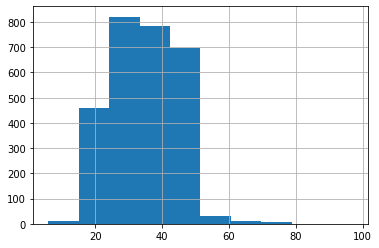

' \nHoặc nâng cao hơn với nhiều tùy chọn\nsns.displot(df, x="QUANTITYORDERED", kind="kde")\nplt.show()\n'

In [28]:
#2.1.2.1 Vẽ biểu đồ Histogram của QUANTITYORDERED
df['QUANTITYORDERED'].hist()
plt.show()

''' 
Hoặc nâng cao hơn với nhiều tùy chọn
sns.displot(df, x="QUANTITYORDERED", kind="kde")
plt.show()
'''

CHO BIẾT XÁC SUẤT XẢY RA TRÊN CÁC ĐOẠN

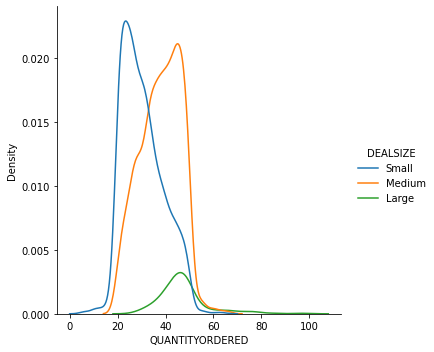

' Màu xanh lá cây ổn định nhất do gần giống với phân phối chuẩn'

In [30]:
#2.1.2.2 Vẽ biểu đồ Histogram của QUANTITYORDERED theo DEALSIZE
#Phân phối (Histogram) của QUANTITYORDERED theo nhóm DEALSIZE
sns.displot(df, x="QUANTITYORDERED", hue="DEALSIZE", kind='kde')
#sns.displot(df, x="QUANTITYORDERED", hue="DEALSIZE", kde=True)
plt.show()

''' Màu xanh lá cây ổn định nhất do gần giống với phân phối chuẩn'''

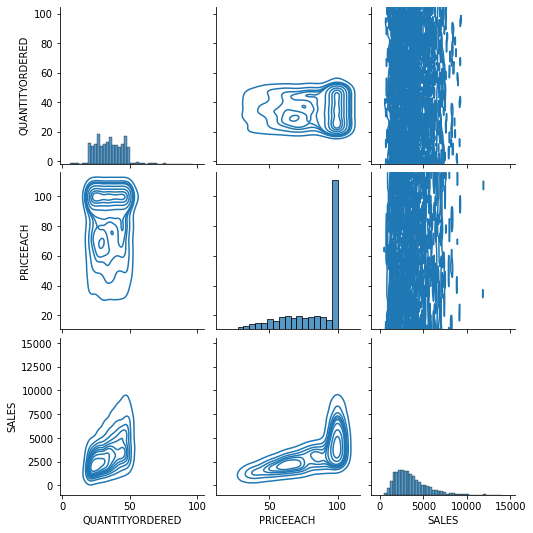

' Biểu đồ tương quan biến số theo từng cấp'

In [24]:
#2.1.2.3 Vẽ biểu đồ PairPlot của QUANTITYORDERED, PRICEEACH, SALES
sns.pairplot(df[['QUANTITYORDERED', 'PRICEEACH', 'SALES']], diag_kind='hist', kind='kde')
plt.show()

''' Biểu đồ tương quan biến số theo từng cấp'''

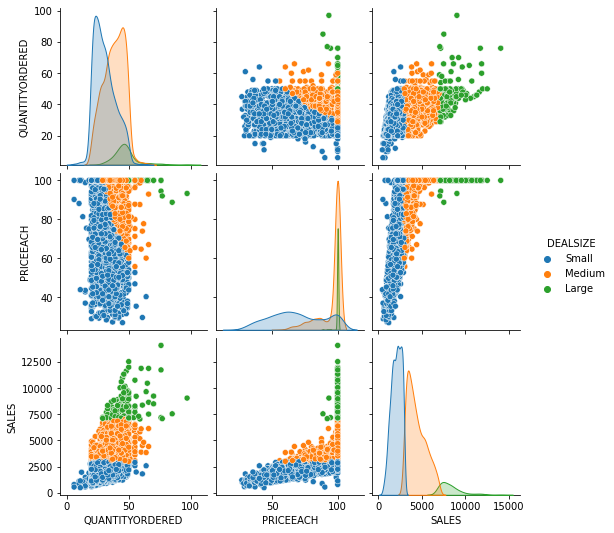

' Đường chéo biểu thị phân phối cho từng biến số, màu cho DEALSIZE'

In [33]:
#2.1.2.5 Phân phối (PairPlot, Histogram) của QUANTITYORDERED, PRICEEACH, SALES theo nhóm DEALSIZE
sns.pairplot(df[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'DEALSIZE']], hue='DEALSIZE')
plt.show()

''' Đường chéo biểu thị phân phối cho từng biến số, màu cho DEALSIZE'''

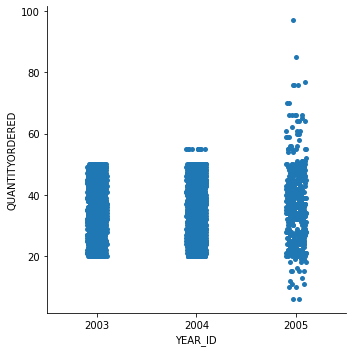

In [34]:
#2.1.3.0 Hãy vẽ trực quan số lượng sản phẩm phân phối theo năm của QUANTITYORDERED (capplot)
sns.catplot(x='YEAR_ID', y='QUANTITYORDERED', data=df)
plt.show()

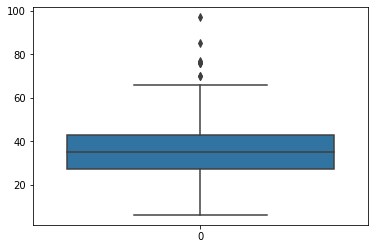

' 3 cách biểu diễn cho từng quý\n    ...Biểu thị cho ngoại biên\n'

In [35]:
#2.1.3.1 Hãy vẽ trực quan số lượng sản phẩm phân phối theo năm của QUANTITYORDERED
sns.boxplot(data=df['QUANTITYORDERED'])
plt.show()

''' 3 cách biểu diễn cho từng quý
    ...Biểu thị cho ngoại biên
'''

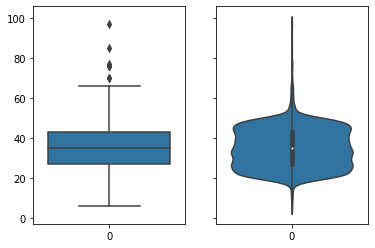

In [9]:
#2.1.3.2 Biểu diễn (Boxplot, Violin) của QUANTITYORDERED trên cùng chart 
_, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(6,4))
sns.boxplot(data=df['QUANTITYORDERED'], ax=axes[0])
sns.violinplot(data=df['QUANTITYORDERED'], ax=axes[1])
plt.show()

KHAI THÁC THÔNG TIN LIÊN QUAN GIỮA CÁC BIẾN SỐ ĐỊNH LƯỢNG

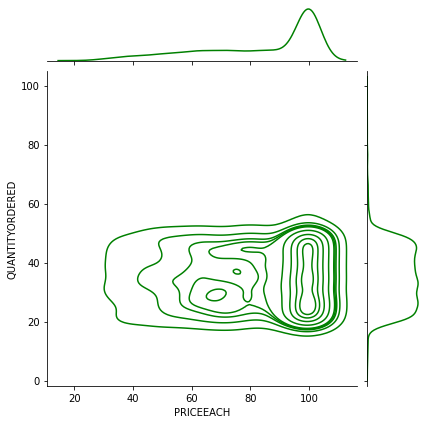

In [41]:
#2.1.2.3 Vẽ biểu đồ JointPlot của QUANTITYORDERED và PRICEEACH
sns.jointplot(data=df, x='PRICEEACH', y='QUANTITYORDERED', kind='kde', color='g')
plt.show()

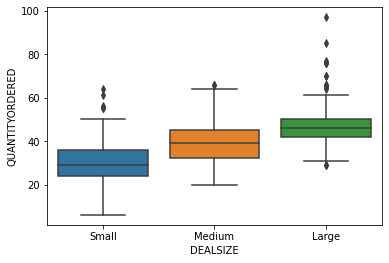

In [42]:
#2.1.3.3 Biểu diễn (boxplot) của QUANTITYORDERED theo nhóm DEALSIZE
sns.boxplot(x='DEALSIZE', y='QUANTITYORDERED', data = df)
plt.show()

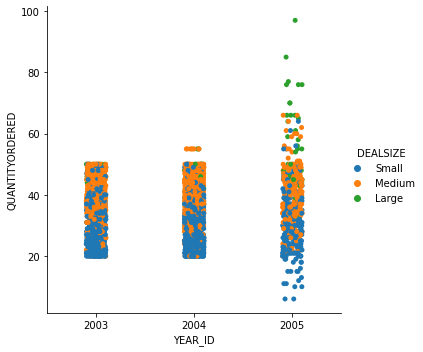

In [43]:
#2.1.3.3 Biểu diễn (boxplot) của QUANTITYORDERED theo nhóm DEALSIZE
sns.catplot(x='YEAR_ID', y='QUANTITYORDERED',hue='DEALSIZE', data = df)
plt.show()

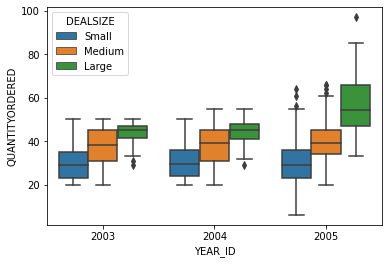

In [44]:
#2.1.3.4 Biểu diễn (boxplot) của QUANTITYORDERED theo năm, nhóm DEALSIZE
sns.boxplot(x='YEAR_ID', y='QUANTITYORDERED',hue='DEALSIZE', data = df)
plt.show()

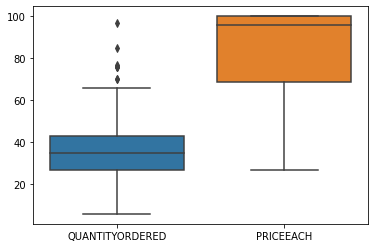

In [45]:
#2.1.3.5 Biểu diễn (boxplot) của QUANTITYORDERED, PRICEEACH
sns.boxplot(data = df[['QUANTITYORDERED', 'PRICEEACH']])
plt.show()

In [48]:
#2.1.4.1 Độ xiên của phân phối (Skew) của QUANTITYORDERED, PRICEEACH
df[['QUANTITYORDERED', 'PRICEEACH']].skew()
''' Phân bố mức độ nghiêng của dữ liệu, dữ liệu xiên càng lớn càng xa rời phân phối chuẩn'''

' Phân bố mức độ nghiêng của dữ liệu, dữ liệu xiên càng lớn càng xa rời phân phối chuẩn'

In [47]:
#2.1.5 Độ nhọn của phân phối (Kutorsis) của QUANTITYOREDERED, PRICEEACH
df[['QUANTITYORDERED', 'PRICEEACH']].kurtosis()

QUANTITYORDERED    0.415744
PRICEEACH         -0.374818
dtype: float64

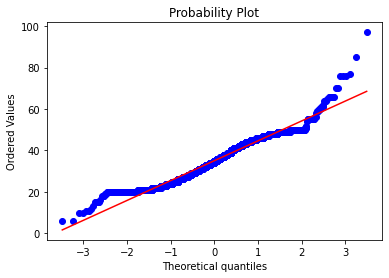

'Không theo phân phối chuẩn do điểm màu xanh càng rời xa đường màu đỏ'

In [7]:
#2.1.6 (Cách 2) Kiểm tra tính chuẩn (Normal distribution) của QUANTITYORDERED, PRICEEACH, SALES
from scipy import stats
stats.probplot(df['QUANTITYORDERED'], plot=sns.mpl.pyplot)
plt.show()

'''Độ nhọn càng nhỏ thì xác suất càng nhỏ'''
'''Không theo phân phối chuẩn do điểm màu xanh càng rời xa đường màu đỏ'''

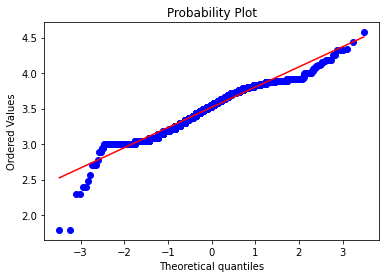

'Nếu dữ liệu không phân phối chuẩn thì cần phải biến đổi dời dữ liệu theo các phân phối như dungfhafm can'

In [8]:
#2.1.7 Transform dữ liệu và kiểm thử Normality của biến TRANSFORMEDQUANTITYORDERED
from scipy import stats
import numpy as np
df[['TRANSFORMEDQUANTITYORDERED']] = df[['QUANTITYORDERED']].transform(func = lambda x : np.log(x))
stats.probplot(df['TRANSFORMEDQUANTITYORDERED'], plot=sns.mpl.pyplot)
plt.show()

'''Nếu dữ liệu không phân phối chuẩn thì cần phải biến đổi dời dữ liệu theo các phân phối như dungfhafm can'''

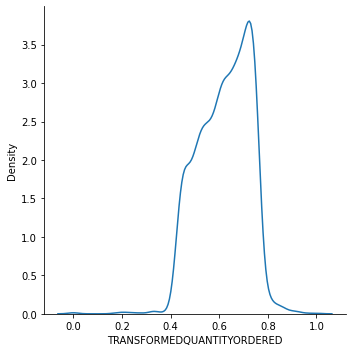

In [11]:
#2.1.8 Hãy thực hiện normaline dữ liệu TRANSFORMEDQUANTITYORDERED
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df[['TRANSFORMEDQUANTITYORDERED']] = min_max_scaler.fit_transform(df[['TRANSFORMEDQUANTITYORDERED']])
sns.displot(df, x="TRANSFORMEDQUANTITYORDERED", kind="kde")
plt.show()

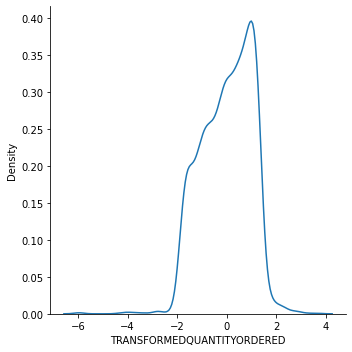

In [13]:
#2.1.9 Hãy thực hiện standardization dữ liệu TRANSFORMEDQUANTITYORDERED
from sklearn.preprocessing import StandardScaler

#define standard scaler
scaler = StandardScaler()
#transform data
df[['TRANSFORMEDQUANTITYORDERED']] = scaler.fit_transform(df[['TRANSFORMEDQUANTITYORDERED']])

sns.displot(df, x="TRANSFORMEDQUANTITYORDERED", kind="kde")
plt.show()


In [14]:
#2.2.1 Ma trận tương quan tuyến tính(Pearson) của các cặp QUANTITYORDERED, PRICEEACH,SALES
df[['QUANTITYORDERED','PRICEEACH', 'SALES']].corr()
#Hoặc df[['QUANTITYORDERED','PRICEEACH', 'SALES']].cov()

,QUANTITYORDERED,PRICEEACH,SALES
QUANTITYORDERED,1.000000,0.005564,0.551426
PRICEEACH,0.005564,1.000000,0.657841
SALES,0.551426,0.657841,1.000000


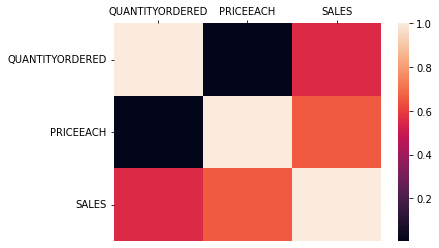

In [15]:
#2.2.2 Vẽ biểu đồ Heatmap tương quan của các cặp QUANTITYORDERED, PRICEEACH, SALES
sns.heatmap(df[['QUANTITYORDERED','PRICEEACH','SALES']].corr(), vmax=1.0, square=False).xaxis.tick_top()
#Vẽ biểu đồ
plt.show()
#Thiếu cái bảng thống kê phía dưới

In [18]:
#2.2.3 Tương quan của biến QUANTITYORDERED,PRICEEACH, SALES theo nhóm DEALSIZE
df.groupby('DEALSIZE')[['QUANTITYORDERED','PRICEEACH','SALES']].corr()

QUANTITYORDERED  PRICEEACH     SALES
DEALSIZE                                                      
Large    QUANTITYORDERED         1.000000  -0.569684  0.317111
         PRICEEACH              -0.569684   1.000000  0.073529
         SALES                   0.317111   0.073529  1.000000
Medium   QUANTITYORDERED         1.000000  -0.443546  0.344825
         PRICEEACH              -0.443546   1.000000  0.444365
         SALES                   0.344825   0.444365  1.000000
Small    QUANTITYORDERED         1.000000  -0.504154  0.312224
         PRICEEACH              -0.504154   1.000000  0.632605
         SALES                   0.312224   0.632605  1.000000

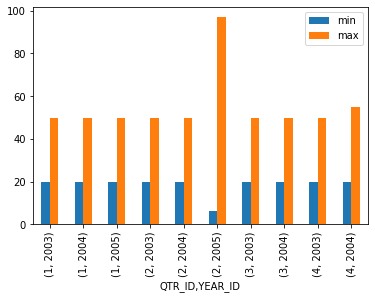

In [16]:
#2.2.4 Vẽ biểu đồ cho biết giá trị min, max của số lượng sản phẩm trong mỗi đơn hàng theo quý, năm
#Gợi ý: Biểu đồ so sánh nhóm un-stacked(vertical)
gb=df.groupby(['QTR_ID','YEAR_ID'])['QUANTITYORDERED'].agg(['min','max'])
gb.plot(kind='bar', stacked=False)
#Vẽ biểu đồ
plt.show()

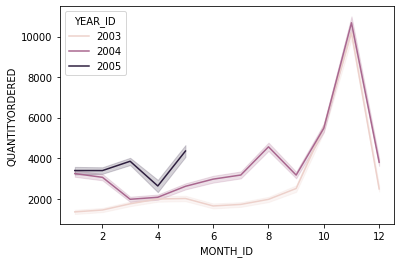

In [17]:
#2.2.5 Vẽ biểu đồ cho biết tổng số lượng sản phẩm theo tháng
#Gợi ý: Biểu đồ line có 2 đường (Ox= tháng, Oy= tổng số lượng)
sns.lineplot(x="MONTH_ID", y="QUANTITYORDERED", hue="YEAR_ID",data=df,estimator=sum)
#Mặc định estimator= mean
#Vẽ biểu đồ
plt.show()

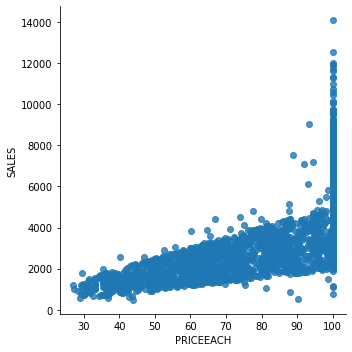

In [19]:
#2.2.6 Vẽ biểu đồ cho biết quan hệ giữa SALES(Oy) và đơn giá(Ox)
#Gợi ý: Biểu đồ Scatter
sns.lmplot(data=df, x="PRICEEACH", y="SALES", fit_reg=False)
#Vẽ biểu đồ
plt.show()

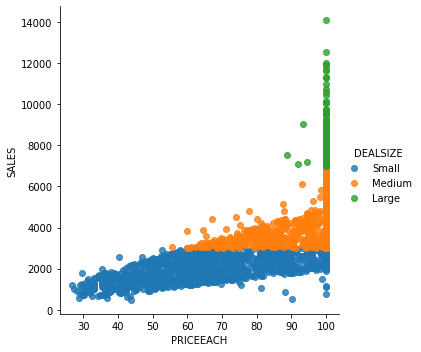

In [20]:
#2.2.7 Vẽ biểu đồ cho biết quan hệ giữa SALES (Oy) và đơn giá(Ox) theo DEALSIZE
sns.lmplot(data=df, x='PRICEEACH', y='SALES', hue='DEALSIZE', fit_reg=False)
#Vẽ biểu đồ
plt.show()

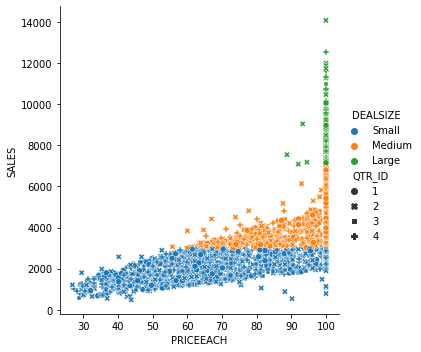

In [21]:
#2.2.8 Vẽ biểu đồ cho biết quan hệ giữa SALES(Oy) và đơn giá(Ox) theo quý, theo DEALSIZE
sns.relplot(data=df, x='PRICEEACH', y='SALES', hue='DEALSIZE', style='QTR_ID')
#Vẽ biểu đồ
plt.show()

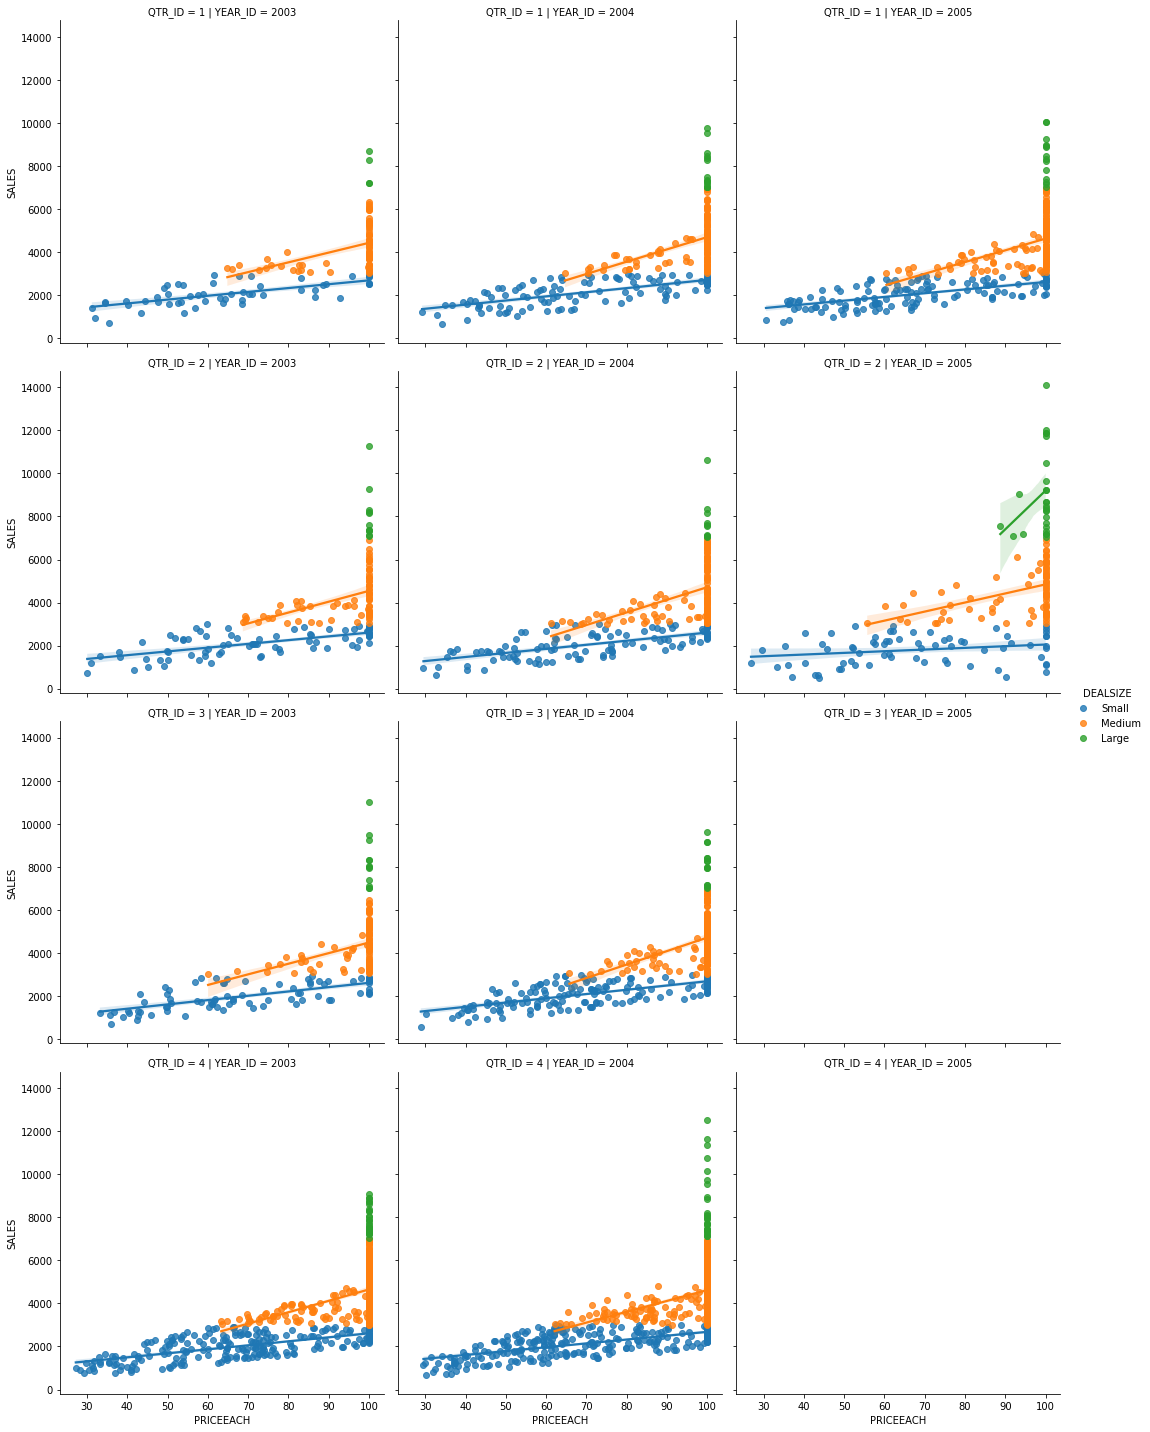

In [22]:
#2.2.9 Vẽ biểu đồ cho biết quan hệ giữa SALES(Oy) và đơn giá(Ox) theo DEALSIZE
sns.lmplot(data=df, x='PRICEEACH', y='SALES', hue='DEALSIZE', col='YEAR_ID', row='QTR_ID', fit_reg=True)
#Vẽ biểu đồ
plt.show()